In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ast

dataframes column names are taken from the `README.md` file in the dataset  
Characters Preprocessing steps:  
- remove movies without a release date, format all other to have only the year
- Infer actors gender when possible
- Keep only relevant columns

Movies Preprocessing steps:  
- remove movies without a release date, format all other to have only the year
- Keep only relevant columns
- Transform tuples into lists


In [39]:
# display full numbers separated with spaces instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(",", " "))
pd.reset_option('display.float_format')

In [40]:
# Load movies as well, used for cross-reference
movies_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", delimiter="\t", header=None)
movies_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]

## Characters Preprocessing

In [41]:
characters_df = pd.read_csv("MovieSummaries/character.metadata.tsv", delimiter="\t", header=None)
characters_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

In [42]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height (in meters)         154824 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [43]:
characters_df.head(10)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
7,975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
9,975900,/m/03vyhn,2001-08-24,Uno,NaN,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy


In [44]:
columns_to_keep = ["Freebase movie ID", "Movie release date", "Actor date of birth", "Actor gender", "Actor ethnicity (Freebase ID)", "Actor name", "Freebase character/actor map ID", "Freebase actor ID"]
ch_df = characters_df[columns_to_keep].copy()
print("percentage of NaNs per columns")
ch_df.isna().mean() * 100

percentage of NaNs per columns


Freebase movie ID                   0.000000
Movie release date                  2.217814
Actor date of birth                23.552763
Actor gender                       10.120288
Actor ethnicity (Freebase ID)      76.466542
Actor name                          0.272484
Freebase character/actor map ID     0.000000
Freebase actor ID                   0.180842
dtype: float64

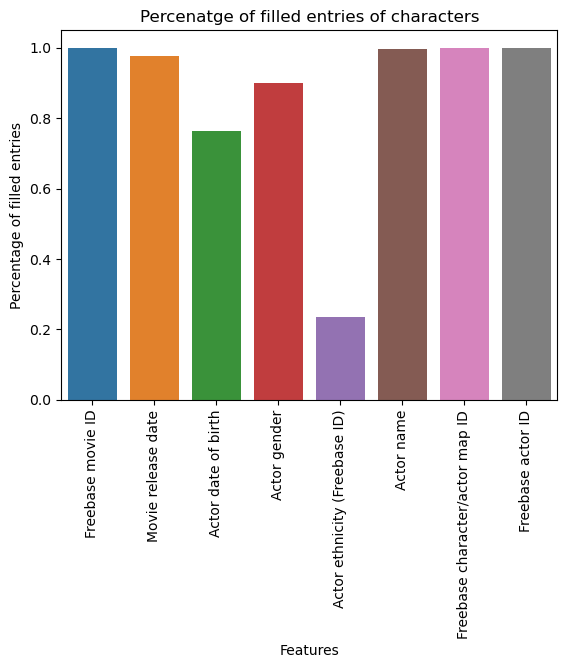

In [45]:
def plot_notNaPercentage(df, title):
    plt.title(title)
    feats = list(df.keys())
    tempdict = {}
    len_df = len(df)
    for feature in feats:
       tempdict[feature] =  df[feature].notna().sum() / len_df

    tempdf = pd.DataFrame([tempdict])

    ax = sns.barplot(data=tempdf)
    ax.set_ylabel('Percentage of filled entries')
    ax.set_xlabel('Features')
    ax.tick_params('x', labelrotation=90)
    plt.show()

plot_notNaPercentage(ch_df, "Percenatge of filled entries of characters")

Actor ethnicitiy is the only value that is higly NaN, might want to drop it later because the column is missing a lot if data. Let's start by processing the dates used in the dataframe. 

In [46]:
ch_df.tail(10)

,Freebase movie ID,Movie release date,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor name,Freebase character/actor map ID,Freebase actor ID
450659,/m/03pcrp,1992-05-21,NaN,F,NaN,Violet Bronte,/m/0kr409m,/m/0kr409z
450660,/m/03pcrp,1992-05-21,1954,M,NaN,Sonny Byrkett,/m/0kr405f,/m/0gn4bz
450661,/m/03pcrp,1992-05-21,1954,M,NaN,Sonny Byrkett,/m/0kr407w,/m/0gn4bz
450662,/m/03pcrp,1992-05-21,1958,F,NaN,Susan Byrkett,/m/0kr40b9,/m/0gn4nd
450663,/m/03pcrp,1992-05-21,NaN,M,NaN,Hal Cleaveland,/m/0kr407c,/m/0kr407h
450664,/m/03pcrp,1992-05-21,1970-05,F,NaN,Dorothy Elias-Fahn,/m/0kr406c,/m/0b_vcv
450665,/m/03pcrp,1992-05-21,1965-04-12,M,NaN,Jonathan Fahn,/m/0kr405_,/m/0bx7_j
450666,/m/0cp05t9,1957,1941-11-18,M,/m/02w7gg,David Hemmings,/m/0g8ngmc,/m/022g44
450667,/m/0cp05t9,1957,NaN,NaN,NaN,Roberta Paterson,/m/0g8ngmj,/m/0g8ngmm
450668,/m/0cp05t9,1957,NaN,NaN,NaN,John Rogers,/m/0g8ngmw,/m/0btz19d


Let's start with dates. First we will see if we can infer the date of missing movie release date in character usig the movies dataset. If thats not possible we'll drop NaN rows:


In [47]:
# Filter for rows with NaN in "Movie release date", then take unique movie IDs and sort them
nan_ch_mo_ids = ch_df[ch_df["Movie release date"].isna()]["Freebase movie ID"].unique()
nan_ch_mo_ids_sorted = sorted(nan_ch_mo_ids)

# Cross-refenrence with Movies_df
# Filter for rows with NaN in "Movie release date", then take unique movie IDs and sort them
nan_mo_ids = movies_df[movies_df["Movie release date"].isna()]["Freebase movie ID"].unique()
nan_mo_ids_sorted = sorted(nan_mo_ids)


print("Unique movie IDs with NaN release dates, sorted:")
print(nan_ch_mo_ids_sorted)
print(nan_mo_ids_sorted)

Unique movie IDs with NaN release dates, sorted:
['/m/016st3', '/m/01j5r0', '/m/01k1hl', '/m/025tfm6', '/m/025trdd', '/m/025vhm_', '/m/025x_cz', '/m/025xk5h', '/m/025z19h', '/m/0261c2_', '/m/0265tck', '/m/02671q_', '/m/02683kd', '/m/02686wj', '/m/0268yjh', '/m/026_b3w', '/m/026_sfj', '/m/026_wkm', '/m/026_ymq', '/m/026blwx', '/m/026cqsb', '/m/026dkc5', '/m/026f39h', '/m/026fwgx', '/m/026h5_4', '/m/026jlt6', '/m/026jz4s', '/m/026k2j0', '/m/026k5s5', '/m/026k70d', '/m/026k7ds', '/m/026mc2x', '/m/026mp4r', '/m/026mzw_', '/m/026nr00', '/m/026p4jr', '/m/026q2k7', '/m/026q69z', '/m/026qkkz', '/m/026qxk1', '/m/026rljv', '/m/026rt6l', '/m/026s04s', '/m/026s0kh', '/m/026syyk', '/m/026t86v', '/m/026tkxz', '/m/026tl67', '/m/026txx4', '/m/026v966', '/m/026vztv', '/m/026w34g', '/m/026wfds', '/m/026wg5w', '/m/026wsck', '/m/026xlbp', '/m/026xt94', '/m/026xtfz', '/m/026y7nl', '/m/026ydf3', '/m/026ydfg', '/m/026yf33', '/m/026ypsq', '/m/026ytbz', '/m/026yxwd', '/m/026z2gj', '/m/026z8wv', '/m/026z_73', '

In [48]:
# Convert both lists to sets for easy set operations
nan_ch_mo_ids_set = set(nan_ch_mo_ids_sorted)
nan_mo_ids_set = set(nan_mo_ids_sorted)

# Find common movie IDs with NaN release dates in both datasets
common_nan_ids = sorted(nan_ch_mo_ids_set.intersection(nan_mo_ids_set))

# Find movie IDs with NaN in ch_df but not in movies_df
nan_in_ch_only = sorted(nan_ch_mo_ids_set - nan_mo_ids_set)

# Display results
print("Movie IDs with NaN release dates in both datasets:")
print(common_nan_ids)

print("Movie IDs with NaN release dates in ch_df but not in movies_df:")
print(nan_in_ch_only)

Movie IDs with NaN release dates in both datasets:
['/m/016st3', '/m/01j5r0', '/m/01k1hl', '/m/025tfm6', '/m/025trdd', '/m/025vhm_', '/m/025x_cz', '/m/025xk5h', '/m/025z19h', '/m/0261c2_', '/m/0265tck', '/m/02671q_', '/m/02683kd', '/m/02686wj', '/m/0268yjh', '/m/026_b3w', '/m/026_sfj', '/m/026_wkm', '/m/026_ymq', '/m/026blwx', '/m/026cqsb', '/m/026dkc5', '/m/026f39h', '/m/026fwgx', '/m/026h5_4', '/m/026jlt6', '/m/026jz4s', '/m/026k2j0', '/m/026k5s5', '/m/026k70d', '/m/026k7ds', '/m/026mc2x', '/m/026mp4r', '/m/026mzw_', '/m/026nr00', '/m/026p4jr', '/m/026q2k7', '/m/026q69z', '/m/026qkkz', '/m/026qxk1', '/m/026rljv', '/m/026rt6l', '/m/026s04s', '/m/026s0kh', '/m/026syyk', '/m/026t86v', '/m/026tkxz', '/m/026tl67', '/m/026txx4', '/m/026v966', '/m/026vztv', '/m/026w34g', '/m/026wfds', '/m/026wg5w', '/m/026wsck', '/m/026xlbp', '/m/026xt94', '/m/026xtfz', '/m/026y7nl', '/m/026ydf3', '/m/026ydfg', '/m/026yf33', '/m/026ypsq', '/m/026ytbz', '/m/026yxwd', '/m/026z2gj', '/m/026z8wv', '/m/026z_73',

None of the nan rows can be inferred, so we will drop them: 

In [49]:
# Drop rows with NaN in "Movie release date" in ch_df
ch_df = ch_df.dropna(subset=["Movie release date"])

# Display the resulting dataframe
print(ch_df.tail(5))

       Freebase movie ID Movie release date Actor date of birth Actor gender  \
450664         /m/03pcrp         1992-05-21             1970-05            F   
450665         /m/03pcrp         1992-05-21          1965-04-12            M   
450666        /m/0cp05t9               1957          1941-11-18            M   
450667        /m/0cp05t9               1957                 NaN          NaN   
450668        /m/0cp05t9               1957                 NaN          NaN   

       Actor ethnicity (Freebase ID)          Actor name  \
450664                           NaN  Dorothy Elias-Fahn   
450665                           NaN       Jonathan Fahn   
450666                     /m/02w7gg      David Hemmings   
450667                           NaN    Roberta Paterson   
450668                           NaN         John Rogers   

       Freebase character/actor map ID Freebase actor ID  
450664                      /m/0kr406c         /m/0b_vcv  
450665                      /m/0kr405_  

Then we've seen that there is the YYYY-MM-DD, YYYY-MM and YYYY in the date format, but there might be others too. Let's investiage that

In [50]:

# Function to classify date format
def classify_date_format(date):
    if len(str(date)) == 4:
        return "YYYY"
    elif len(str(date)) == 7:
        return "YYYY-MM"
    elif len(str(date)) == 10:
        return "YYYY-MM-DD"
    else:
        return "Other"  # In case there are unexpected formats

# Apply function to create new columns for format classification
ch_df["Movie release date format"] = ch_df["Movie release date"].apply(classify_date_format)
ch_df["Actor date of birth format"] = ch_df["Actor date of birth"].apply(classify_date_format)

print(ch_df["Movie release date format"].value_counts())
print(ch_df["Actor date of birth format"].value_counts())

Movie release date format
YYYY-MM-DD    273887
YYYY          149802
YYYY-MM        16985
Name: count, dtype: int64
Actor date of birth format
YYYY-MM-DD    321218
Other         105269
YYYY           13465
YYYY-MM          722
Name: count, dtype: int64


Indeed, there are still other formats, let's see how they look like:

In [51]:
ch_df[ch_df["Actor date of birth format"] == "Other"]["Actor date of birth"].value_counts(dropna=False)

Actor date of birth
NaN                          105260
1961-08-04T19:24-10:00            5
1930-01-01T00:00:00-04:00         4
Name: count, dtype: int64

Apart from NaN values in "Actor date of birth format", that we will keep because there is still some other useful information (Gender, ethnicity), we can transform all the other formats into year quite easily by taking th 4 first characters of the release date:

In [52]:
def clean_date(date):

        return str(date)[:4] if pd.notna(date)  else date

ch_df["Movie release date"] = ch_df["Movie release date"].apply(clean_date)
ch_df["Actor date of birth"] = ch_df["Actor date of birth"].apply(clean_date)

# Drop the date format columns that you no longer need
ch_df = ch_df.drop(columns=["Movie release date format", "Actor date of birth format"])

print(ch_df.tail(5))

       Freebase movie ID Movie release date Actor date of birth Actor gender  \
450664         /m/03pcrp               1992                1970            F   
450665         /m/03pcrp               1992                1965            M   
450666        /m/0cp05t9               1957                1941            M   
450667        /m/0cp05t9               1957                 NaN          NaN   
450668        /m/0cp05t9               1957                 NaN          NaN   

       Actor ethnicity (Freebase ID)          Actor name  \
450664                           NaN  Dorothy Elias-Fahn   
450665                           NaN       Jonathan Fahn   
450666                     /m/02w7gg      David Hemmings   
450667                           NaN    Roberta Paterson   
450668                           NaN         John Rogers   

       Freebase character/actor map ID Freebase actor ID  
450664                      /m/0kr406c         /m/0b_vcv  
450665                      /m/0kr405_  

Now lets look at the actors gender:

In [53]:
# We have a lot of NaN Values in Gender, might want to infer them.
ch_df["Actor gender"].value_counts(dropna=False)

Actor gender
M      263902
F      131312
NaN     45460
Name: count, dtype: int64

We will use the python library gender detector to classifiy the NaNs:
*** DONT RUN THIS CELL IF YOU DONT HAVE IT INSTALLED***

In [54]:
import gender_guesser.detector as gender

# Initialize the gender detector
detector = gender.Detector()

# Function to infer gender based on actor's name
def infer_gender(name):
    guessed_gender = detector.get_gender(str(name).split()[0])  # Use the first name
    if guessed_gender in ["male", "mostly_male"]:
        return "M"
    elif guessed_gender in ["female", "mostly_female"]:
        return "F"
    else:
        return None  # For unknown or ambiguous names

# Apply the function to the "Actor name" column where "Actor gender" is NaN
ch_df["Actor gender"].fillna(ch_df["Actor name"].apply(infer_gender), inplace=True)
ch_df["Actor gender"].value_counts(dropna=False)


C:\Users\Silly Emilien\AppData\Local\Temp\ipykernel_4896\2982530588.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ch_df["Actor gender"].fillna(ch_df["Actor name"].apply(infer_gender), inplace=True)


Actor gender
M       286023
F       144992
None      9659
Name: count, dtype: int64

In [55]:
# The remaining names in the list would be quite hard to infer, leave them as is
ch_df[pd.isna(ch_df["Actor gender"])]["Actor name"].value_counts()

Actor name
P. S. Veerappa       15
Sriranjani           14
Wheeler & Woolsey    12
Leung Siu Hung       11
Shun Lau             10
                     ..
Lui Woon-Suen         1
Tsui Yat-Gung         1
Got Heung-Ting        1
Wu Jiaxiang           1
Blair                 1
Name: count, Length: 7251, dtype: int64

In [ ]:
# Need to do something with Ethnicity. Either drop it because of too low percentage of values, or get them from IMBD or WIKIDATA
ch_df["Actor ethnicity (Freebase ID)"].value_counts(dropna=False)

Actor ethnicity (Freebase ID)
NaN           337832
/m/0dryh9k     15495
/m/0x67        10022
/m/041rx        9845
/m/02w7gg       6026
               ...  
/m/033fjj          1
/m/04lhnps         1
/m/08xbxs          1
/m/04hqxn          1
/m/026d074         1
Name: count, Length: 478, dtype: int64

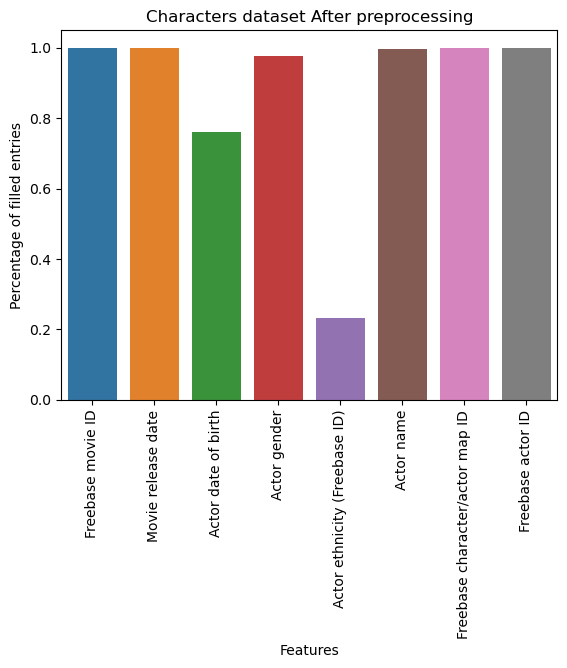

In [57]:
plot_notNaPercentage(ch_df,"Characters dataset After preprocessing")

## Movies Preprocessing

In [58]:
movies_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", delimiter="\t", header=None)
movies_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]

In [59]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Wikipedia movie ID                         81741 non-null  int64  
 1   Freebase movie ID                          81741 non-null  object 
 2   Movie name                                 81741 non-null  object 
 3   Movie release date                         74839 non-null  object 
 4   Movie box office revenue                   8401 non-null   float64
 5   Movie runtime                              61291 non-null  float64
 6   Movie languages (Freebase ID:name tuples)  81741 non-null  object 
 7   Movie countries (Freebase ID:name tuples)  81741 non-null  object 
 8   Movie genres (Freebase ID:name tuples)     81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [60]:
movies_df.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


percentage of NaNs per columns


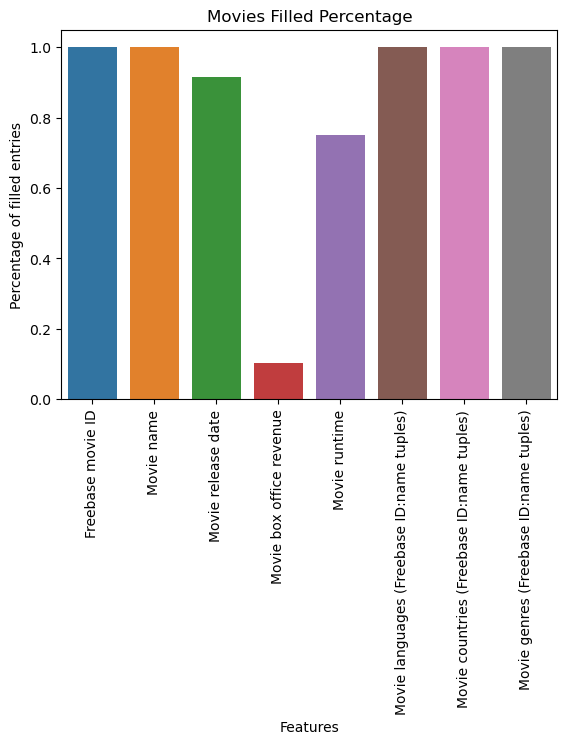

In [61]:
movie_columns_to_keep = ["Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]
mo_df = movies_df[movie_columns_to_keep].copy()

print("percentage of NaNs per columns")
mo_df.isna().mean() * 100
plot_notNaPercentage(mo_df, "Movies Filled Percentage")

In [63]:
# Drop rows with NaN in "Movie release date" in ch_df
mo_df = mo_df.dropna(subset=["Movie release date"])

# Apply function to create new columns for format classification
mo_df["Movie release date format"] = mo_df["Movie release date"].apply(classify_date_format)

print(mo_df["Movie release date format"].value_counts())


Movie release date format
YYYY-MM-DD    39373
YYYY          32172
YYYY-MM        3294
Name: count, dtype: int64


In [64]:
mo_df["Movie release date"] = mo_df["Movie release date"].apply(clean_date)

# Drop the date format columns that you no longer need
mo_df = mo_df.drop(columns=["Movie release date format"])

print(mo_df.tail(5))

      Freebase movie ID                                         Movie name  \
81736        /m/0j7hxnt                           Mermaids: The Body Found   
81737        /m/0g4pl34                                            Knuckle   
81738        /m/02pygw1                                  Another Nice Mess   
81739         /m/03pcrp  The Super Dimension Fortress Macross II: Lover...   
81740        /m/02w7zz8                                            Spliced   

      Movie release date  Movie box office revenue  Movie runtime  \
81736               2011                       NaN          120.0   
81737               2011                       NaN           96.0   
81738               1972                       NaN           66.0   
81739               1992                       NaN          150.0   
81740               2002                       NaN           86.0   

      Movie languages (Freebase ID:name tuples)  \
81736        {"/m/02h40lc": "English Language"}   
81737        {

In [65]:
movies_df.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
79701,9919031,/m/06_y8fw,Un Viaje al más allá,1963,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/01g6gs"": ""Black-and-white""}"
23275,17387556,/m/047n618,Det Sande Ansigt,1951,NaN,95.0,"{""/m/0295r"": ""Danish Language""}","{""/m/0k6nt"": ""Denmark""}","{""/m/0lsxr"": ""Crime Fiction""}"
17490,31992932,/m/0fpbpdr,The Alien Years,1988-04-19,NaN,300.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0chghy"": ""Australia""}","{""/m/07s9rl0"": ""Drama""}"
13358,6289589,/m/0f_ldz,The Holy Mountain,1926-12-17,NaN,106.0,"{""/m/06ppq"": ""Silent film"", ""/m/04306rv"": ""Ger...","{""/m/084n_"": ""Weimar Republic"", ""/m/0345h"": ""G...","{""/m/03q4nz"": ""World cinema"", ""/m/06ppq"": ""Sil..."
54459,6872477,/m/0gtmqf,The Taste of Others,2000-03-01,NaN,118.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03q4nz"": ""..."
29703,7943163,/m/026ky5d,Like Mike 2: Streetball,2006-06-06,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01z02hx"": ""Sports"", ""/m/0hqxf"": ""Family F..."
77411,32228746,/m/0gy09m5,Broken Bottles,NaN,NaN,NaN,{},{},"{""/m/02hmvc"": ""Short Film"", ""/m/05p553"": ""Come..."
10779,27702708,/m/0c3zjn7,Real Steel,2011-09-06,295120796.0,127.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01z02hx"": ""Sports"", ""/m/06n90"": ""Science ..."
75950,29017654,/m/0dgs56g,Seaview Knights,1994,NaN,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01z4y"": ""Comedy""}"
72534,10890584,/m/02qt57m,Aap Beati,1976,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}"


In [66]:
# Function to extract names from each column
def extract_names(column_data):
    def parse_tuples(tuple_str):
        if tuple_str == '{}':
            return []  # Return empty list if no data
        parsed_dict = ast.literal_eval(tuple_str)  # Safely evaluate string as dictionary
        return list(parsed_dict.values())  # Return only the values (names)

    return column_data.apply(parse_tuples)

# Apply the extraction function to each relevant column
mo_df["Movie languages"] = extract_names(mo_df["Movie languages (Freebase ID:name tuples)"])
mo_df["Movie countries"] = extract_names(mo_df["Movie countries (Freebase ID:name tuples)"])
mo_df["Movie genres"] = extract_names(mo_df["Movie genres (Freebase ID:name tuples)"])

# Drop the original columns if they are no longer needed
mo_df.drop(columns=[
    "Movie languages (Freebase ID:name tuples)", 
    "Movie countries (Freebase ID:name tuples)", 
    "Movie genres (Freebase ID:name tuples)"
], inplace=True)

# Display the resulting dataframe
print(mo_df.head(5))

  Freebase movie ID                                         Movie name  \
0         /m/03vyhn                                     Ghosts of Mars   
1         /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2        /m/0crgdbh                                        Brun bitter   
3        /m/0285_cd                                   White Of The Eye   
4         /m/01mrr1                                  A Woman in Flames   

  Movie release date  Movie box office revenue  Movie runtime  \
0               2001                14010832.0           98.0   
1               2000                       NaN           95.0   
2               1988                       NaN           83.0   
3               1987                       NaN          110.0   
4               1983                       NaN          106.0   

        Movie languages             Movie countries  \
0    [English Language]  [United States of America]   
1    [English Language]  [United States of America]   

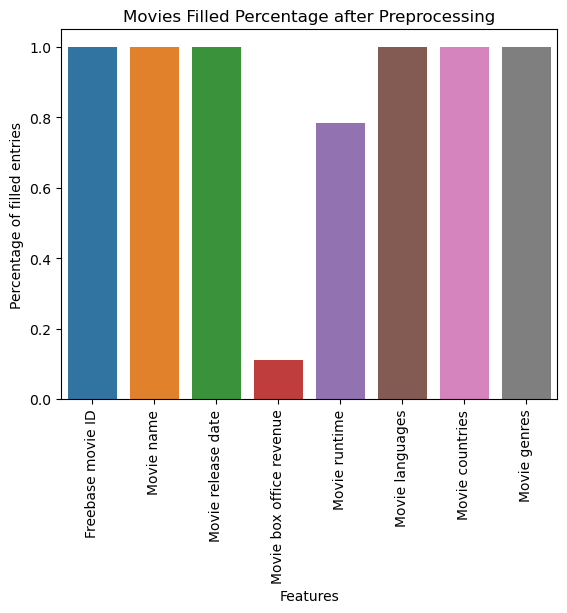

In [67]:
plot_notNaPercentage(mo_df, "Movies Filled Percentage after Preprocessing")

Still need to get Box office revenue from IMDB or WIKIDATA

In [68]:
# Save the files
mo_df.to_csv("./MovieSummaries/processed_movies.csv", index=False)
ch_df.to_csv("./MovieSummaries/processed_characters.csv", index=False)
